TODO
- Normal working hours
- Efficiency within those hours (either in meetings or build work)
- Split between meetings and build
- D3 visualization: https://observablehq.com/@d3/calendar-view

In [1]:
import requests
from ics import Calendar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt\

In [2]:
url = 'https://calendar.google.com/calendar/ical/4kaefeajbrp4ucss3lunngrcq4%40group.calendar.google.com/public/basic.ics'
raw = requests.get(url).text
c = Calendar(raw) #.replace('BEGIN:VCALENDAR', 'BEGIN:VCALENDAR\r\nPRODID:noah-rocks'))
c

<Calendar with 2115 events and 0 todo>

In [3]:
items = []
for e in list(c.events):
    items.append({
        'name': e.name,
        'begin': str(e.begin),
        'end': str(e.end),
        'duration_min': (e.duration.total_seconds())/60.0,
        'duration_hr': (e.duration.total_seconds())/60.0/60.0
    })

df = pd.DataFrame(items)
df['begin'] = pd.to_datetime(df.begin)
df['begin'] = df.begin.apply(lambda x: x.replace(tzinfo=None))
df['date'] = df.begin.dt.date
df['end'] = pd.to_datetime(df.end)
df['end'] = df.begin.apply(lambda x: x.replace(tzinfo=None))
df.head()

,name,begin,end,duration_min,duration_hr,date
0,McLaren Park solo gravel ride,2020-03-27 00:00:00,2020-03-27 00:00:00,1440.0,24.0,2020-03-27
1,Clay Days,2018-04-25 00:00:00,2018-04-25 00:00:00,1440.0,24.0,2018-04-25
2,Quick Yosemite trip with Minshu and Andres,2017-11-11 00:00:00,2017-11-11 00:00:00,2880.0,48.0,2017-11-11
3,Lunch w/ Mike @ Thanh Tham vietnamese,2020-02-05 00:00:00,2020-02-05 00:00:00,1440.0,24.0,2020-02-05
4,Craig Airbnb farewell send off,2019-02-21 21:00:00,2019-02-21 21:00:00,60.0,1.0,2019-02-21


In [4]:
df.sort_values(by='date', ascending=False)

,name,begin,end,duration_min,duration_hr,date
1354,Photog Pace Yosemite to Vegas bike ride,2020-10-01,2020-10-01,10080.0,168.0,2020-10-01
379,SF Bike to work day,2020-09-24,2020-09-24,1440.0,24.0,2020-09-24
998,IRONMAN CANADA Penticton w/ UCSF tri!!!,2020-08-30,2020-08-30,1440.0,24.0,2020-08-30
971,HOLD SIERRA CHALLENGE SOON?!,2020-08-10,2020-08-10,7200.0,120.0,2020-08-10
1358,White Mountain bike??,2020-08-08,2020-08-08,1440.0,24.0,2020-08-08
...,...,...,...,...,...,...
1854,Aix-en-Provence Couchsurfing,2013-05-10,2013-05-10,2880.0,48.0,2013-05-10
2032,Marseille,2013-05-07,2013-05-07,4320.0,72.0,2013-05-07
607,La Camargue Bing Trip,2013-05-03,2013-05-03,4320.0,72.0,2013-05-03
1038,Paris study abroad orientation,2013-04-08,2013-04-08,7200.0,120.0,2013-04-08


In [42]:
import re

def flip_category(s):
    return ' '.join(s.split(' ')[-1:] + s.split(' ')[:-1])

def sanitize_name(s):
    s_lower = s.lower()
    if ('forward' in s_lower) & ('build' in s_lower):
        return 'Forward: Build'
    if ('forward' in s_lower) & ('meeting' in s_lower):
        return 'Forward: Meeting'
    return s

def extract_names(s):
    split_by_w_list = s.split('w/ ')
    
    if len(split_by_w_list) < 2:
        return "SOLO"
    
    name_and_location = split_by_w_list[-1]
    split_by_at_list = name_and_location.split('@')
    
    return name_and_location.strip() if len(split_by_at_list) < 2 else split_by_at_list[0].strip()
    
    

# def extract_names_and_location(s):
#     name_search_matches = re.search(r'w\/\s(.*)\s@?', s)
#     return name_search_matches.group(0)


#df['name'] = df['name'].apply(extract_names)
df['name_extracted'] = df['name'].apply(extract_names)
df['date_m'] = df.begin.dt.strftime('%Y-%m')
df['date_y'] = df['begin'].dt.year
df.head()



#extract_names("Lunch w/ Mike @ Thanh Tham vietnamese")

,name,begin,end,duration_min,duration_hr,date,name_extracted,date_m,date_y
0,McLaren Park solo gravel ride,2020-03-27 00:00:00,2020-03-27 00:00:00,1440.0,24.0,2020-03-27,SOLO,2020-03,2020
1,Clay Days,2018-04-25 00:00:00,2018-04-25 00:00:00,1440.0,24.0,2018-04-25,SOLO,2018-04,2018
2,Quick Yosemite trip with Minshu and Andres,2017-11-11 00:00:00,2017-11-11 00:00:00,2880.0,48.0,2017-11-11,SOLO,2017-11,2017
3,Lunch w/ Mike @ Thanh Tham vietnamese,2020-02-05 00:00:00,2020-02-05 00:00:00,1440.0,24.0,2020-02-05,Mike,2020-02,2020
4,Craig Airbnb farewell send off,2019-02-21 21:00:00,2019-02-21 21:00:00,60.0,1.0,2019-02-21,SOLO,2019-02,2019


In [59]:

import random





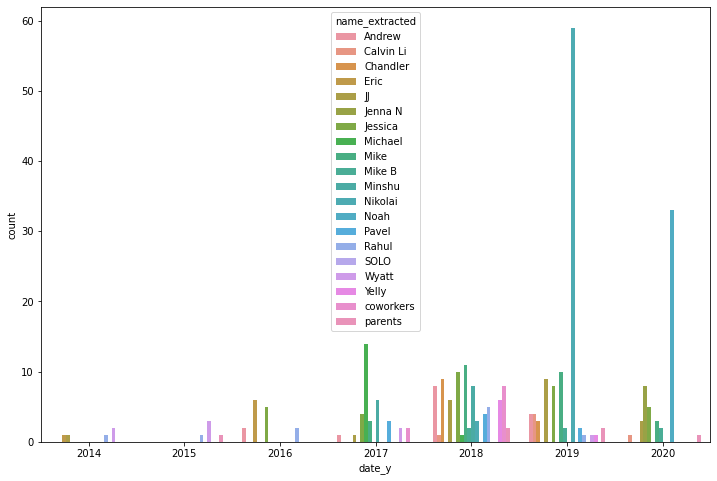

In [63]:
# df.dtypes
top_n = 20

top_names = list(df.name_extracted.value_counts()[:top_n].index)
# random.shuffle(top_names)
top_names.sort()

dft = df[
    (df['name_extracted'] != 'SOLO') &\
    (df['name_extracted'].isin(top_names))
].copy()
dft = dft.groupby(['date_y', 'name_extracted'])['name'].agg(['count']).reset_index()

# dft is throwaway within a cell
sns.barplot(x='date_y', y='count', hue='name_extracted', data=dft, hue_order=top_names);

In [7]:
import matplotlib.dates as mdates

In [8]:
def plot_within_range(df_in, start, end=None):
    if end is None:
        end = '2021-01-01'
    df1 = df_in[
        (df_in['date'] >= pd.to_datetime(start)) &\
        (df_in['date'] < pd.to_datetime(end))
    ].copy()
    dft = df1.groupby(['date', 'name'])['duration_hr'].agg(['sum']).reset_index()
    dft.head()

    my_dates = pd.date_range(dft.date.min(), dft.date.max(), freq='D')
    idx = pd.MultiIndex.from_product([my_dates, dft.name.unique()], names=['date', 'name'])
    dft = dft.set_index(['date', 'name']).reindex(idx).fillna(0).reset_index()
    dft.sort_values(by='date', ascending=False)
    dft['date'] = dft['date'].apply(lambda x: x.strftime('%m/%d/%Y'))

    dft.pivot(index='date', columns='name', values='sum').plot.bar(stacked=True);
    plt.xlabel('');
    plt.ylabel('Productive Hours');

    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
    ax.legend(handles, labels)
    plt.show()
    return

# For grid view https://observablehq.com/@d3/calendar-view
plt.rcParams['figure.figsize'] = [12, 8]
plot_within_range(df, '2017-04-17', '2020-05-17')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x139a874d0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plt.rcParams['figure.figsize'] = [10, 20]
sns.barplot(y=df.name.value_counts().index, x=df.name.value_counts());